Parker Pschorr

801004564

3/16/2023

ECGR 4105

Homework 2

Problem 2

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

In [2]:
#Importing data from the csv file
df =pd.read_csv('/content/diabetes.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Separating out the features
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values
# Separating out the target
Y = df.iloc[:,8].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

print(X[:5])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [4]:
# Splitting data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = None)

In [5]:
kfold = KFold(n_splits = 5, random_state = None, shuffle = False)
classifier = LogisticRegression(solver='liblinear')
results = cross_val_score(classifier, X, Y, cv=kfold)
print("Accuracy: %", results.mean()*100.0)
print("Standard Deviation: %", results.std()*100.0)

Accuracy: % 77.09107885578474
Standard Deviation: % 3.5044620887859


In [6]:
classifier.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [7]:
# Creating a prediction array
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0, 1, 0, 1, 1, 0, 0, 1, 0])

In [8]:
# Determining the accuracy, precision, and recall of the model
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7337662337662337
Precision: 0.8205128205128205
Recall: 0.48484848484848486


In [9]:
# Creating a confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[81,  7],
       [34, 32]])

Text(0.5, 257.44, 'Predicted outcome')

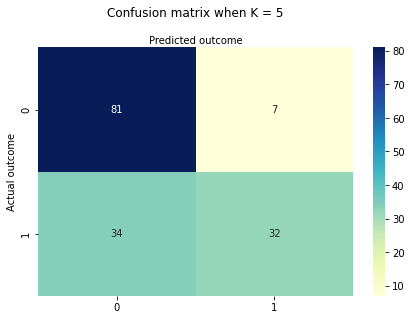

In [10]:
# Plotting the confusion matrix using a heatmap
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix when K = 5', y=1.1)
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')

In [11]:
kfold10 = KFold(n_splits = 10, random_state = None, shuffle = False)
classifier2 = LogisticRegression(solver='liblinear')
results2 = cross_val_score(classifier2, X, Y, cv=kfold10)
print("Accuracy: %", results2.mean()*100.0)
print("Standard Deviation: %", results2.std()*100.0)

Accuracy: % 77.99555707450445
Standard Deviation: % 5.008800607602481


In [12]:
classifier2.fit(X_train, Y_train)
Y_pred2 = classifier2.predict(X_test)

In [13]:
# Determining the accuracy, precision, and recall of the model
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred2))
print("Precision:",metrics.precision_score(Y_test, Y_pred2))
print("Recall:",metrics.recall_score(Y_test, Y_pred2))

Accuracy: 0.7727272727272727
Precision: 0.6956521739130435
Recall: 0.6037735849056604


In [14]:
# Creating a confusion matrix
cnf_matrix2 = confusion_matrix(Y_test, Y_pred2)
cnf_matrix2

array([[87, 14],
       [21, 32]])

Text(0.5, 257.44, 'Predicted outcome')

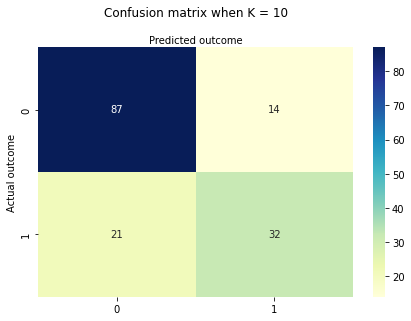

In [15]:
# Plotting the confusion matrix using a heatmap
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix when K = 10', y=1.1)
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')